In [1]:
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
!ls ../dilution/results_bulk_supplement/ps_2_pd_1

# ps=2, pd=1 example

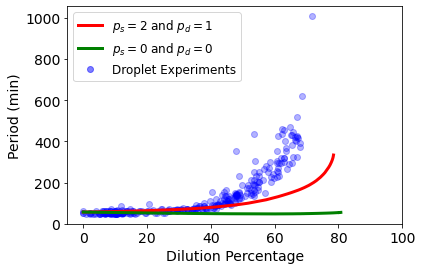

In [8]:
data_path = "../dilution/"
# Bulk Simulation with decay
bulk_path = "results_bulk_supplement/ps_2_pd_1/dilution.npz"
bulk = np.load(data_path + bulk_path, allow_pickle=True)
bulk_period = [d['Per'] if d is not None else np.NaN for d in bulk['feature_list']]
bulk_period = np.array(bulk_period)
# Bulk Simulation without decay
bulk_nd_path = "results_bulk_no_decay/bulk_no_decay.npz"
bulk_nd = np.load(data_path + bulk_nd_path, allow_pickle=True)
bulk_nd_period = [d['Per'] if d is not None else np.NaN for d in bulk_nd['feature_list']]
bulk_nd_period = np.array(bulk_nd_period)
# Experimental Data
exp_path = '../experimental_data/dilution_period/01_06_21_0uM-Cdc25.txt'
aux = pd.read_csv(exp_path)
cycle = 2
points = aux[['cycleID','dilutionPer','periodPeak']].dropna()
xdata = points.loc[aux['cycleID'] == cycle]['dilutionPer']
ydata = points.loc[aux['cycleID'] == cycle]['periodPeak']

fig = plt.figure()
ax = plt.gca()
ax.plot(100*(1-bulk['dil_list']), bulk_period, color='red', linewidth=3, 
        label=r'$p_{s}=2$ and $p_{d}=1$', zorder=1)
ax.plot(100*(1-bulk_nd['dil_list']), bulk_nd_period, color='green', linewidth=3, 
        label='$p_{s}=0$ and $p_{d}=0$', zorder=1)
# Experimental data
plt.plot(xdata, aux['frameStep'][0]*ydata, 'o', rasterized=True, 
        alpha = 0.3, color='b', zorder=0, label = 'Droplet Experiments' )
ax.tick_params(labelsize=14)
#ax.lines[-1].set_label('Experiments')
ax.set_xlim([-5, 100])
ax.set_xlabel('Dilution Percentage', fontsize=14)
ax.set_ylabel('Period (min)', fontsize=14)
leg = ax.legend(loc='upper left', fontsize=12)
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0.5)
plt.savefig('./SVGs/supp_ps_2_pd_1.svg', format='svg', bbox_inches='tight')
plt.savefig('./PNGs/supp_ps_2_pd_1.png', format='png', bbox_inches='tight', dpi=300)
plt.show()